In [1]:
from tqdm.notebook import tqdm as notebook_tqdm
from huggingface_hub import login

In [2]:
login()

In [4]:
from diffusers import DiffusionPipeline, DPMSolverMultistepScheduler, AutoencoderKL
import torch

In [5]:
pipe = DiffusionPipeline.from_pretrained(
    "prompthero/openjourney", 
    torch_dtype=torch.float16
)

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


In [6]:
vae = AutoencoderKL.from_pretrained("stabilityai/sd-vae-ft-mse", torch_dtype=torch.float16).to("cuda")

In [7]:
pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config)
pipe.vae = vae
pipe = pipe.to("cuda")

In [13]:
# Setting for image generation
import random
# prompt = 'A cat sitting. Black and white photography. Leica lens. Hi-res. hd 8k --ar 2:3'
prompt = 'Horse and girl. Black and white photography. Leica lens. Hi-res. hd 8k --ar 2:3'
num_steps = 20
num_variations = 4
prompt_guidance = 9
dimensions = (400, 600) # (width, height) tuple
random_seeds = [random.randint(0, 65000) for _ in range(num_variations)]

In [14]:
images = pipe(prompt= num_variations * [prompt],
              num_inference_steps=num_steps,
              guidance_scale=prompt_guidance,
              height = dimensions[0],
              width = dimensions[1],
              generator = [torch.Generator('cuda').manual_seed(i) for i in random_seeds]
             ).images

  0%|          | 0/20 [00:00<?, ?it/s]

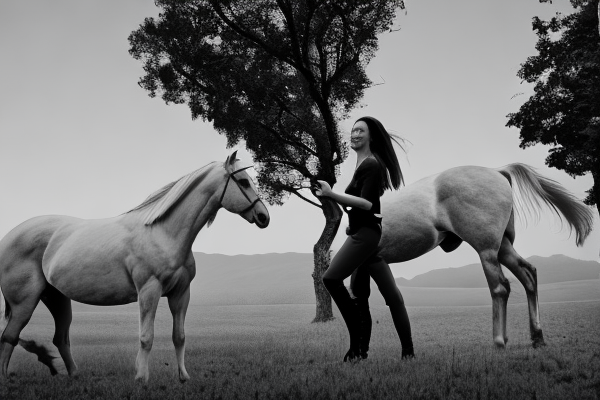

In [15]:
images[0]

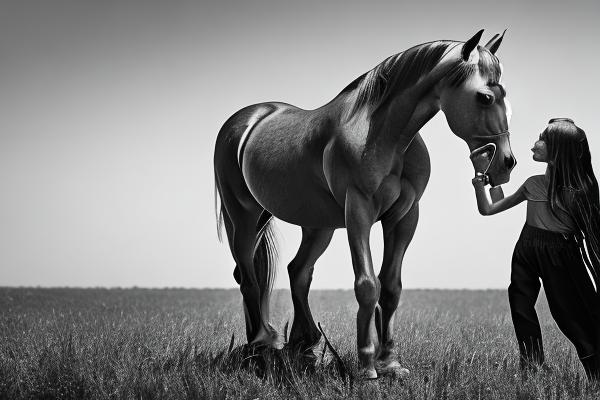

In [16]:
images[1]

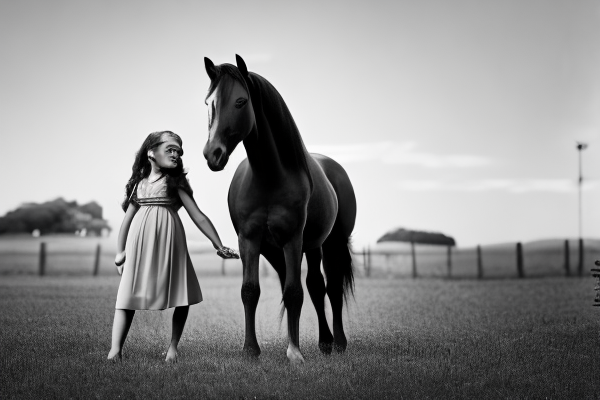

In [17]:
images[3]